In [1]:
%%bash
pip install seaborn
pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_read = pd.read_csv('BlackFriday.csv')
data = data_read.loc[1:10000,'Gender':'Purchase']


In [4]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 10 columns):
Gender                        10000 non-null object
Age                           10000 non-null object
Occupation                    10000 non-null int64
City_Category                 10000 non-null object
Stay_In_Current_City_Years    10000 non-null object
Marital_Status                10000 non-null int64
Product_Category_1            10000 non-null int64
Product_Category_2            6757 non-null float64
Product_Category_3            2997 non-null float64
Purchase                      10000 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 781.3+ KB


In [6]:
data.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,10000.000000,10000.000000,10000.000000,6757.000000,2997.000000,10000.000000
mean,8.433100,0.405400,5.293000,9.796359,12.811144,9152.354200
std,6.660462,0.490994,3.660668,5.055550,4.057049,4881.582657
min,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,3.000000,0.000000,2.000000,5.000000,9.000000,5831.750000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8021.000000
75%,15.000000,1.000000,8.000000,14.000000,16.000000,11922.250000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


M    7637
F    2363
Name: Gender, dtype: int64

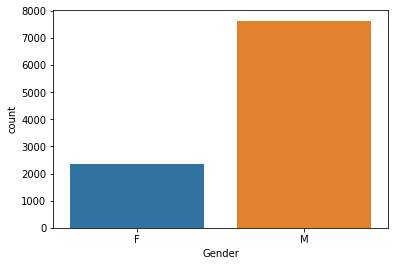

In [7]:
sns.countplot(x='Gender', data=data)
data.loc[:,'Gender'].value_counts()

B    3711
A    3346
C    2943
Name: City_Category, dtype: int64

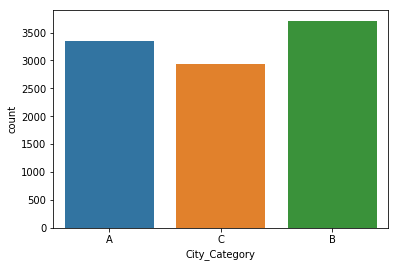

In [8]:
sns.countplot(x = 'City_Category',data = data)
data.loc[:,'City_Category'].value_counts()

1     3191
3     1891
2     1769
4+    1684
0     1465
Name: Stay_In_Current_City_Years, dtype: int64

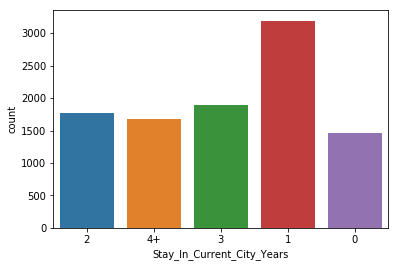

In [9]:
sns.countplot(x = 'Stay_In_Current_City_Years',data = data)
data.loc[:,'Stay_In_Current_City_Years'].value_counts()

0    5946
1    4054
Name: Marital_Status, dtype: int64

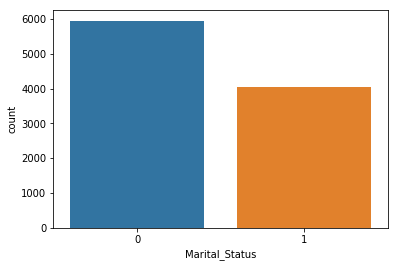

In [10]:
sns.countplot(x= 'Marital_Status',data = data)
data.loc[:,'Marital_Status'].value_counts()

In [11]:
data_knn = data_read[['Occupation','Gender','Purchase','Marital_Status']]

In [12]:
data_knn.head()

,Occupation,Gender,Purchase,Marital_Status
0,10,F,8370,0
1,10,F,15200,0
2,10,F,1422,0
3,10,F,1057,0
4,16,M,7969,0


In [13]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 4 columns):
Occupation        537577 non-null int64
Gender            537577 non-null object
Purchase          537577 non-null int64
Marital_Status    537577 non-null int64
dtypes: int64(3), object(1)
memory usage: 16.4+ MB


In [14]:
data_knn.describe()

,Occupation,Purchase,Marital_Status
count,537577.00000,537577.000000,537577.000000
mean,8.08271,9333.859853,0.408797
std,6.52412,4981.022133,0.491612
min,0.00000,185.000000,0.000000
25%,2.00000,5866.000000,0.000000
50%,7.00000,8062.000000,0.000000
75%,14.00000,12073.000000,1.000000
max,20.00000,23961.000000,1.000000


In [15]:
#KNN-2 # find the accuracy for a particular value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 7)
x,y = data_knn.loc[:,data_knn.columns != 'Gender'], data_knn.loc[:,'Gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state = 35)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=7) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=7) accuracy is:  0.7269894713344991


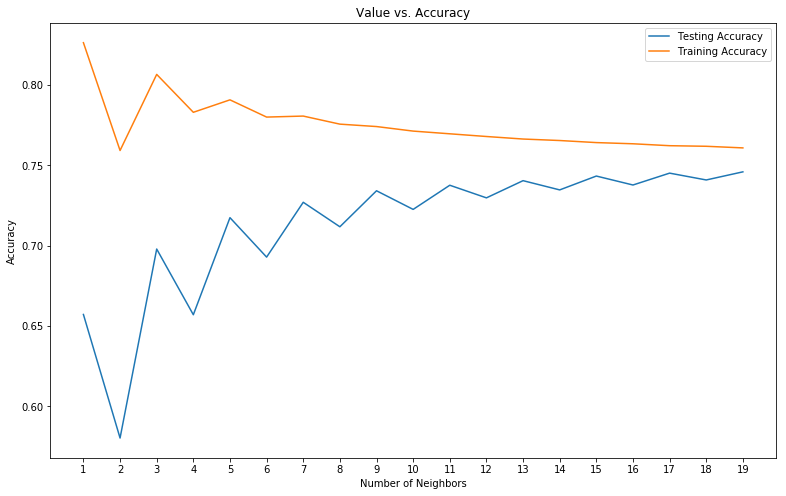

Best Accuracy is 0.7459261877301983 with K = 19


In [16]:
#Best K value selection
k_range = np.arange(1,20)
test_acuracy = []
train_acuracy = []

for i,k in enumerate(k_range):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    train_acuracy.append(knn.score(x_train,y_train))
    test_acuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=(13,8))
plt.plot(k_range, test_acuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_acuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_acuracy),1+test_acuracy.index(np.max(test_acuracy))))    